# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
file_path = '/content/drive/My Drive/machine-learning/bank_transactions_data_2.csv'
df = pd.read_csv(file_path)

In [50]:
# Menampilkan beberapa baris pertama dari dataset
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [51]:
# Kolom-kolom yang akan di-drop karena memiliki atribut terlalu unik
columns_to_drop = [
    'TransactionID',
    'AccountID',
    'TransactionDate',
    'DeviceID',
    'IP Address',
    'MerchantID',
    'PreviousTransactionDate'
]

In [52]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=columns_to_drop)

In [53]:
# Menampilkan 5 baris pertama untuk verifikasi
print(df.head())

   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                   81              1         5112.21  
1             Doctor                  141              1        13758.91  
2            Student                   56              1         1122.35  
3            Student                   25              1         8569.06  
4            Student                  198              1         7429.40  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [54]:
#Menampilkan Informasi Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 176.8+ KB
None


In [55]:
# Memahami Struktur Data
print("Jumlah baris dan kolom:", df.shape)
print("\nTinjauan jenis data:")
print(df.dtypes)

Jumlah baris dan kolom: (2512, 9)

Tinjauan jenis data:
TransactionAmount      float64
TransactionType         object
Location                object
Channel                 object
CustomerAge              int64
CustomerOccupation      object
TransactionDuration      int64
LoginAttempts            int64
AccountBalance         float64
dtype: object


In [56]:
# Mengidentifikasi Missing Value
print("\nJumlah Missing Value:")
print(df.isnull().sum())


Jumlah Missing Value:
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


In [57]:
# Analisis Distribusi dan Korelasi
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


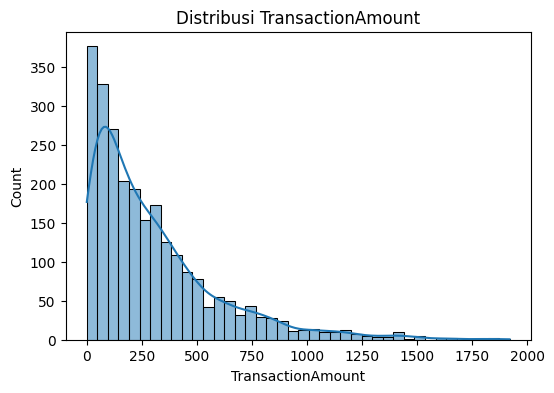

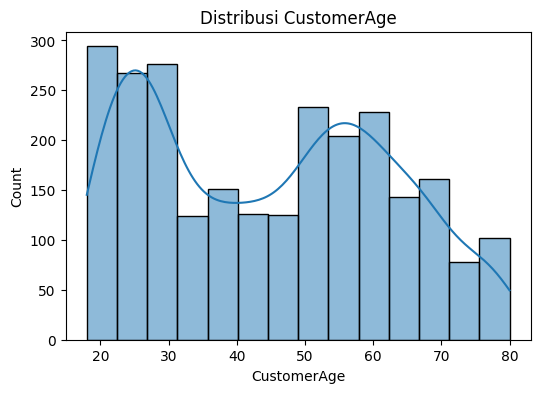

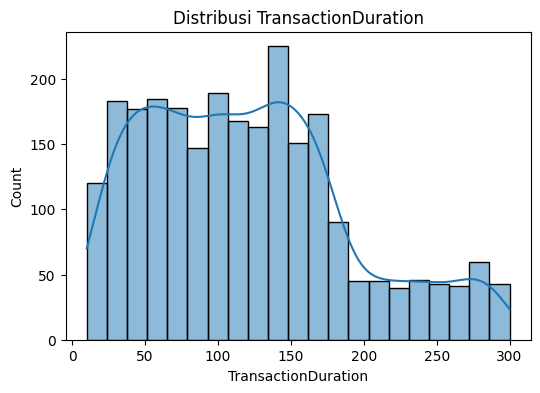

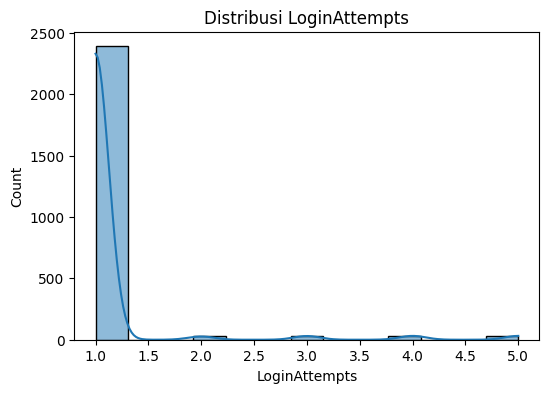

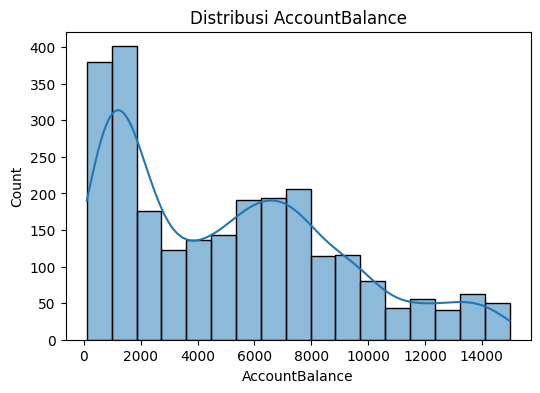

In [58]:
# Visualisasi distribusi variabel numerik dengan Histogram
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

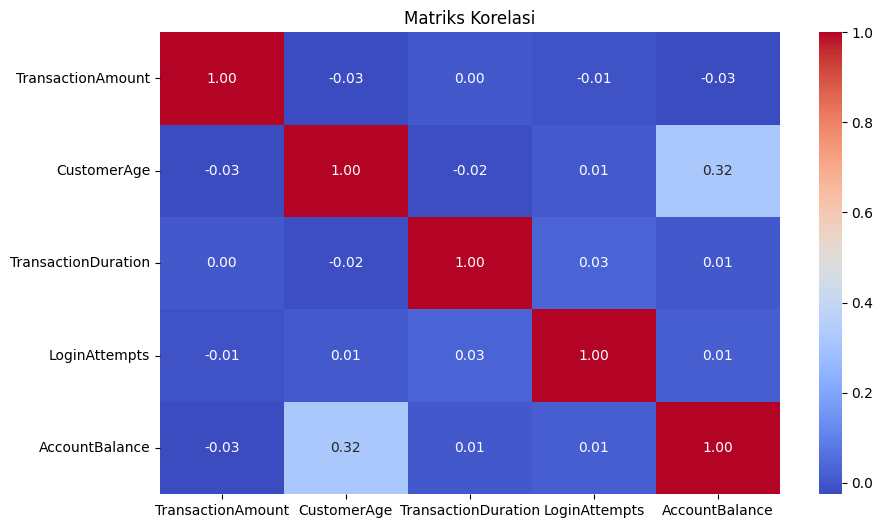

In [59]:
# Korelasi antar variabel numerik
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

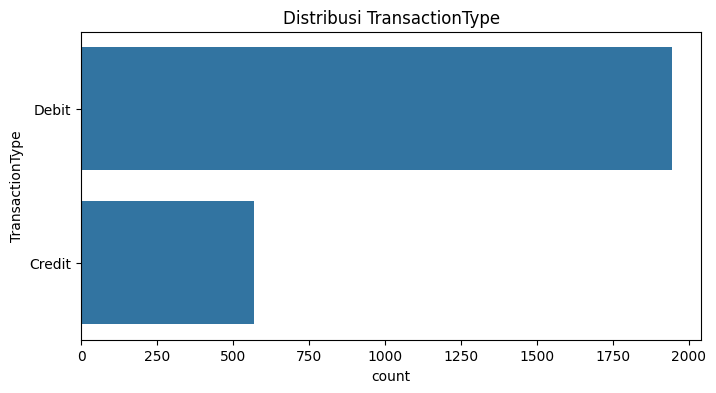

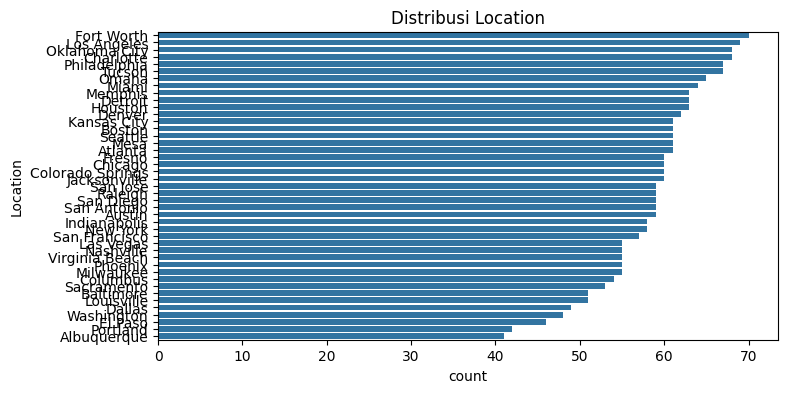

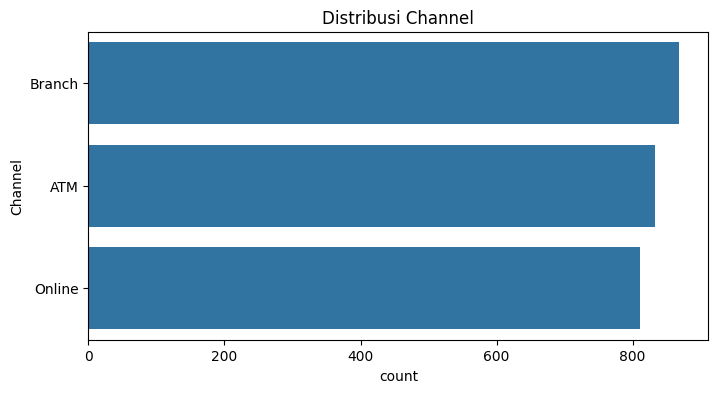

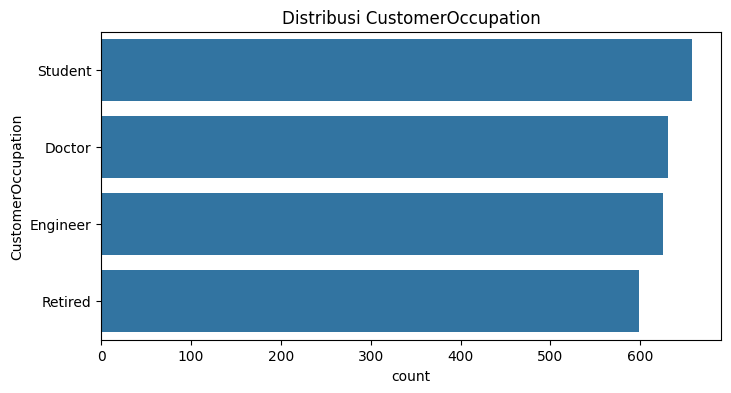

In [60]:
# Visualisasi variabel kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Pada proses EDA diketahui bahwa dataset ini tidak memiliki missing values, sehingga tidak dilakukan proses penanganan missing values.

In [61]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)
print("\nJumlah data setelah menghapus duplikat:", df.shape)


Jumlah data setelah menghapus duplikat: (2512, 9)


In [62]:
# Encoding data kategorikal
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [63]:
# Normalisasi data numerik
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [64]:
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.971275                1        36        0     1.423718   
1           0.269440                1        15        0     1.311287   
2          -0.586882                1        23        2    -1.443277   
3          -0.387456                1        33        2    -1.049768   
4          -0.973468                0         1        2    -1.049768   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0            -0.552443      -0.206794       -0.000537  
1                   0             0.305314      -0.206794        2.216472  
2                   3            -0.909842      -0.206794       -1.023534  
3                   3            -1.353017      -0.206794        0.885797  
4                   3             1.120184      -0.206794        0.593589  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Model ini akan dibangun menggunakan algoritma **K-Means** dengan alasan sebagai berikut:
*   Setelah preprocessing, semua fitur telah diencode dan dinormalisasi menjadi bentuk numerik, yang sangat cocok untuk K-Means karena algoritma ini menggunakan jarak Euclidean untuk mengelompokkan data.
*   Berdasarkan analisis korelasi dan distribusi data, ada indikasi bahwa transaksi memiliki pola yang dapat dikelompokkan berdasarkan fitur seperti jumlah transaksi, jenis transaksi, atau status pelanggan.
* K-Means lebih efisien dibandingkan metode lain, terutama jika dataset memiliki jumlah sampel yang besar.
* Dengan metode Elbow, kita dapat menentukan jumlah klaster terbaik berdasarkan nilai Within-Cluster Sum of Squares (WCSS), sehingga menghasilkan pemisahan klaster yang lebih baik.



In [65]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df)
df['Cluster'] = kmeans.predict(df)

In [66]:
print("\nLabel klaster yang dihasilkan:")
print(df['Cluster'].value_counts())


Label klaster yang dihasilkan:
Cluster
1    874
0    833
2    805
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [67]:
# Menentukan jumlah klaster optimal dengan metode Elbow
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

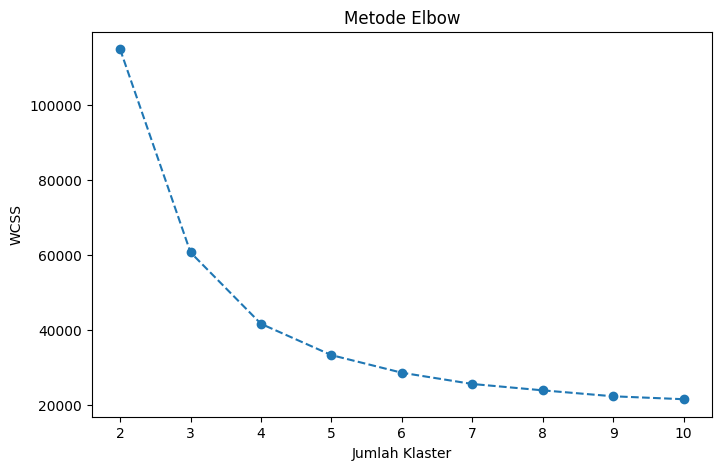

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.title('Metode Elbow')
plt.show()

In [69]:
# Evaluasi menggunakan Silhouette Score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

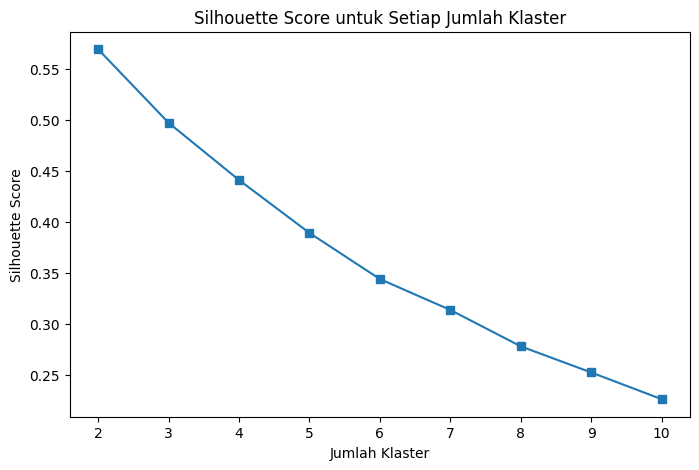

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap Jumlah Klaster')
plt.show()

In [71]:
# Menampilkan jumlah klaster optimal berdasarkan Silhouette Score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Jumlah klaster optimal berdasarkan Silhouette Score: {optimal_k}")

Jumlah klaster optimal berdasarkan Silhouette Score: 2


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Tidak dilakukan karena tidak ada fitur yang memiliki korelasi sempurna selain dengan dirinya sendiri.

In [72]:
# Menghapus fitur dengan korelasi absolut 1.00 (kecuali diagonal)
correlated_features = set()
corr_matrix = numerical_df.corr()

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):  # Mengecek seluruh matriks
        if i != j and abs(corr_matrix.iloc[i, j]) == 1.0:  # Pastikan bukan diagonal
            colname = corr_matrix.columns[j]
            correlated_features.add(colname)

df.drop(columns=correlated_features, inplace=True)
print(f"Fitur yang dihapus karena korelasi 1.00: {correlated_features}")

Fitur yang dihapus karena korelasi 1.00: set()


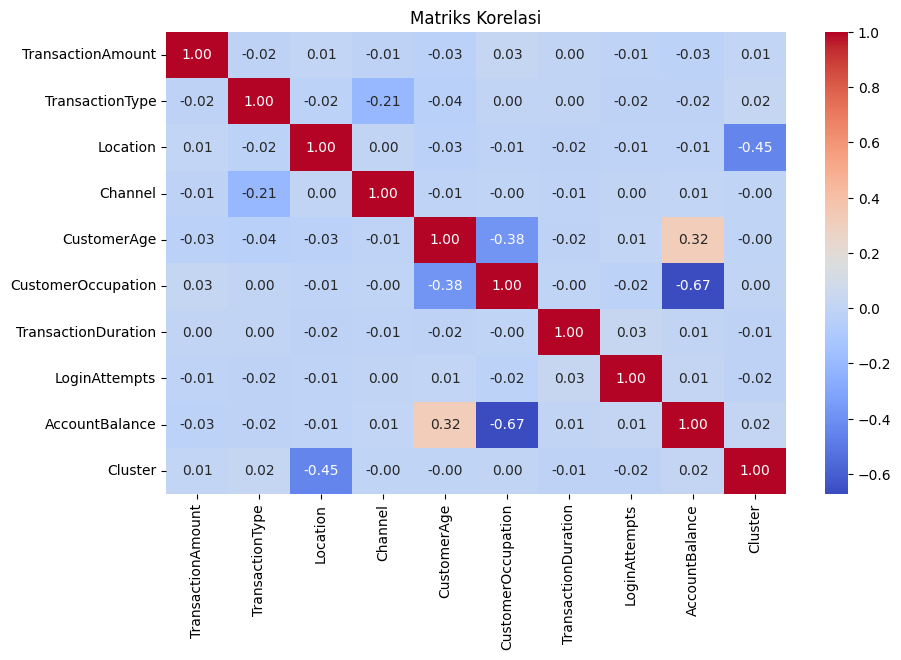

In [73]:
# Korelasi antar variabel numerik
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

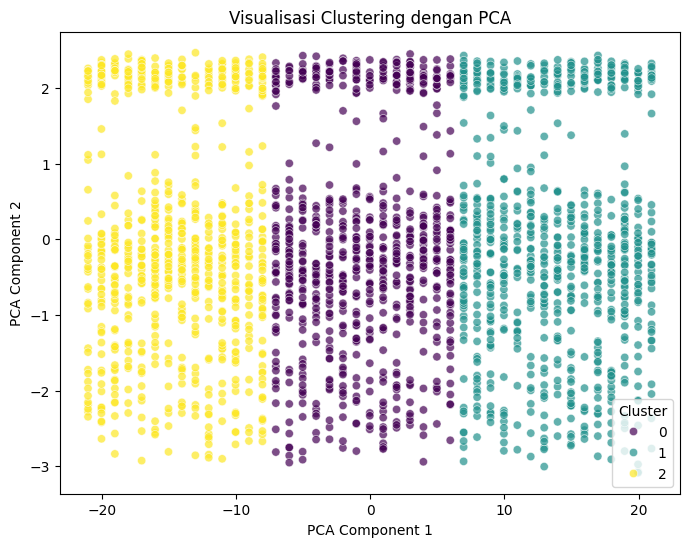

In [74]:
# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df.drop(columns=['Cluster']))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Clustering dengan PCA')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [75]:
df_normalized = df.copy()
df_normalized['Cluster'] = kmeans.labels_

In [76]:
# Mengembalikan data ke bentuk aslinya
for col in categorical_columns:
    df_normalized[col] = label_encoders[col].inverse_transform(df_normalized[col])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [77]:
if 'scaler' in locals():
    df[numerical_columns] = scaler.inverse_transform(df[numerical_columns])

In [78]:
print("\nData setelah inverse transform:")
print(df.head())


Data setelah inverse transform:
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
4              13.45                0         1        2         26.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0                 81.0            1.0         5112.21   
1                   0                141.0            1.0        13758.91   
2                   3                 56.0            1.0         1122.35   
3                   3                 25.0            1.0         8569.06   
4                   3                198.0            1.0         7429.40   

   Cluster  
0        1  
1        0  
2        0  
3        1  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [79]:
# Analisis karakteristik tiap cluster
print("\nKarakteristik tiap cluster:")
print(df.groupby('Cluster').mean())

print("\nDistribusi jumlah data dalam tiap cluster:")
print(df['Cluster'].value_counts())


Karakteristik tiap cluster:
         TransactionAmount  TransactionType   Location   Channel  CustomerAge  \
Cluster                                                                         
0               291.643469         0.769508  20.435774  0.989196    45.130852   
1               303.656007         0.760870  34.859268  0.995423    43.964531   
2               297.169205         0.792547   6.638509  0.988820    44.971429   

         CustomerOccupation  TransactionDuration  LoginAttempts  \
Cluster                                                           
0                  1.503001           121.421369       1.147659   
1                  1.511442           118.332952       1.102975   
2                  1.516770           119.226087       1.124224   

         AccountBalance  
Cluster                  
0           5018.107539  
1           5120.834016  
2           5206.753466  

Distribusi jumlah data dalam tiap cluster:
Cluster
1    874
0    833
2    805
Name: count, dtype: 

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.
## Cluster 0:
*   **Rata-rata jumlah transaksi**: 121.42
*   **Rata-rata besaran total transaksi**: $291.64

*   **Rata-rata usia pelanggan**: 45,13 tahun
*   **Rata-rata saldo akun**: $5,018.11

*   **Rata-rata durasi transaksi**: 1.50 detik

*  **Analisis**: Cluster ini terdiri dari pelanggan dengan aktivitas transaksi yang sangat tinggi (jumlah transaksi tertinggi di antara semua cluster). Besaran transaksi relatif moderat, dan saldo akun yang stabil menunjukkan kondisi keuangan yang baik. Usia rata-rata 45 tahun mengindikasikan bahwa pelanggan dalam kelompok ini kemungkinan adalah individu yang telah mapan secara finansial, seperti profesional atau pemilik bisnis. Durasi transaksi yang sangat singkat menunjukkan efisiensi tinggi, mungkin karena transaksi rutin atau penggunaan layanan yang sudah familiar.

## Cluster 1:
*   **Rata-rata jumlah transaksi**: 118.33
*   **Rata-rata besaran total transaksi**: $303.66

*   **Rata-rata usia pelanggan**: 43,96 tahun
*   **Rata-rata saldo akun**: $5,120.83

*   **Rata-rata durasi transaksi**: 1.51 detik

*  **Analisis**: Pelanggan dalam cluster ini memiliki karakteristik mirip dengan Cluster 0, tetapi dengan saldo akun lebih tinggi dan usia sedikit lebih muda. Tingkat transaksi yang tinggi dan durasi singkat menunjukkan kebiasaan transaksi yang efisien, mungkin terkait kebutuhan bisnis atau gaya hidup sibuk. Saldo akun yang besar mencerminkan stabilitas keuangan, sementara lokasi transaksi yang lebih beragam (nilai Location: 34.86) bisa mengindikasikan mobilitas tinggi atau penggunaan multi-channel.

## Cluster 2:
*   **Rata-rata jumlah transaksi**: 119.23
*   **Rata-rata besaran total transaksi**: $297.17

*   **Rata-rata usia pelanggan**: 44.97 tahun
*   **Rata-rata saldo akun**: $5,206.75
*   **Rata-rata durasi transaksi**: 1.52 detik

*  **Analisis**: Cluster ini memiliki saldo akun tertinggi dan besaran transaksi yang seimbang. Jumlah transaksi sedikit lebih rendah daripada Cluster 0 dan 1, tetapi tetap signifikan. Lokasi transaksi yang sangat rendah (6.64) menunjukkan konsentrasi pada area tertentu, seperti transaksi online atau lokasi fisik yang terbatas. Usia yang mendekati 45 tahun dan durasi transaksi cepat mengarah pada profil pelanggan yang mungkin lebih fokus pada investasi atau transaksi besar namun terencana.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [80]:
output_path = "/content/drive/My Drive/machine-learning/clustered_data.csv"
df.to_csv(output_path, index=False)

print(f"File telah diekspor ke: {output_path}")

File telah diekspor ke: /content/drive/My Drive/machine-learning/clustered_data.csv
